In [87]:
import sys
import os

In [88]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.compat.v2 as tf
import tensorflow_probability as tfp
tf.enable_v2_behavior()

plt.rcParams['figure.figsize'] = [8.0, 6.0]
plt.rcParams['figure.dpi'] = 100

In [89]:
tfd = tfp.distributions
dtype = np.float32

## Probability distribution

Make the probability distribution equal to a sum of Normal distributions.  The tensorflow_probability function *tfp.distributions.Mixture* is used to combine two *tfp.distributions.Normal* distributions.

In [90]:
mix = 0.3
g = tfd.Mixture( cat=tfd.Categorical(probs=[mix, 1.-mix]), 
                components=[tfd.Normal(loc=0.0, scale=1.0), tfd.Normal(loc=6.0, scale=1.25),])


In [91]:
samples = tfp.mcmc.sample_chain(
  num_results=5000,
  current_state=dtype(1),
  kernel=tfp.mcmc.RandomWalkMetropolis(g.log_prob),
  num_burnin_steps=500,
  trace_fn=None,
  seed=0)

In [92]:
sample_mean = tf.math.reduce_mean(samples, axis=0)
sample_std = tf.sqrt(
    tf.math.reduce_mean(
        tf.math.squared_difference(samples, sample_mean),
        axis=0))

print('Estimated mean: {}'.format(sample_mean))
print('Estimated standard deviation: {}'.format(sample_std))

Estimated mean: 4.174340724945068
Estimated standard deviation: 2.9990310668945312


## Plot the time series of the "walker"

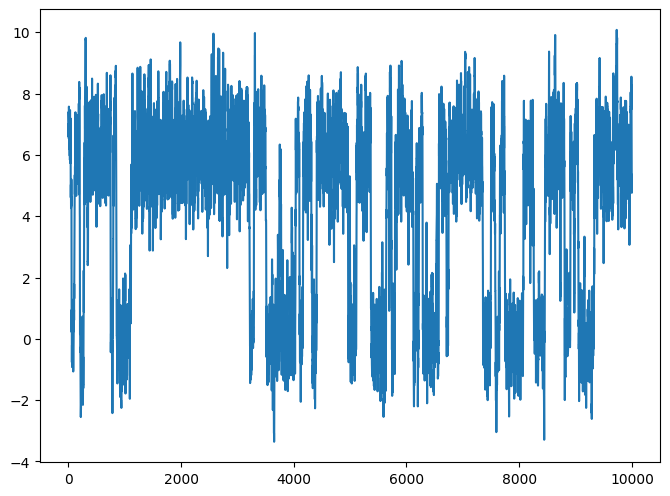

In [93]:
plt.plot(samples)

## Plot the distribution that MH arrives at

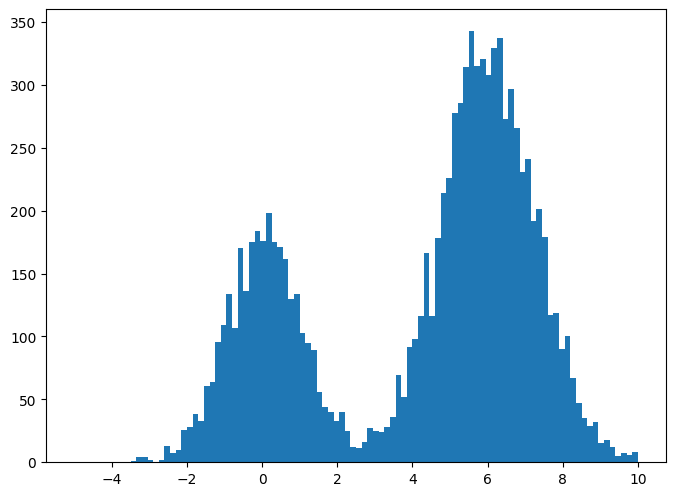

In [95]:
res = plt.hist( samples, bins=100, range=(-5,10) )
plt.show()